In [1]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
from astropy.convolution import convolve_fft, convolve, Gaussian2DKernel
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl
from glob import glob

plt.style.use('paper')

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
inputfiles = glob('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/*TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits')
inputfiles.remove('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/h13co+10.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits')
inputfiles.sort()

inputfiles = ['/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hc3n1110.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/sio21.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/so3221.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/cs21.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hco+10.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hn13c10.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits',             
                '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/h13cn10.TP_7M_12M_weighted_mosaic.K.kms.galactic.max.fits']

hdus = ['']*(len(inputfiles))

for i, inputfile in enumerate(inputfiles): 
    
    # remove h13co
    if 'h13co' in inputfile:
        continue
        
    #smooth hnco
    if 'hnco' in inputfile:
        hdu_hnco = fits.open(inputfile)[0]
        gauss_kernel = Gaussian2DKernel(5)
        hdu_hnco.data = convolve_fft(hdu_hnco.data, gauss_kernel, nan_treatment='interpolate')

    hdus[i] = fits.open(inputfile)[0]
    gauss_kernel = Gaussian2DKernel(1)
    hdus[i].data = convolve(hdus[i].data, gauss_kernel, nan_treatment='interpolate')

nan_treatment='interpolate', however, NaN values detected post convolution. A contiguous region of NaN values, larger than the kernel size, are present in the input array. Increase the kernel size to avoid this.


In [3]:
inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits'
inputfile_cont = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/cont_12mtp_final_filled.fits'
inputfile_meerkat = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
inputfile_meerkatalpha = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/MeerKAT_Galactic_Centre_alpha.fits'
inputfile_xray = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/GC_GB_fs23.fits'

hdu_max = fits.open(inputfile_max)[0]
hdu_cont = fits.open(inputfile_cont)[0]
hdu_meerkat = fits.open(inputfile_meerkat)[0]
hdu_meerkatalpha = fits.open(inputfile_meerkatalpha)[0]
hdu_meerkatalpha_masked = hdu_meerkatalpha.copy()
hdu_meerkatalpha_masked.data[~np.isnan(hdu_meerkatalpha_masked.data)] = 1
hdu_meerkatalpha_masked.data[np.isnan(hdu_meerkatalpha_masked.data)] = 0
hdu_xray = fits.open(inputfile_xray)[0]

In [4]:
bbox = dict(facecolor='whitesmoke', 
            alpha=0.95, 
            boxstyle='round')

name_dict = {'cs21': 'CS',
            'h13cn10': 'H$^{13}$CN',
            'hc3n1110': 'HC$_3$N',
            'hco+10': 'HCO$^+$',
            'hn13c10': 'HN$^{13}$C',
            'hnco43': 'HNCO',
            'sio21': 'SiO',
            'so3221': 'SO'}

No contour levels were found within the data range.
No contour levels were found within the data range.


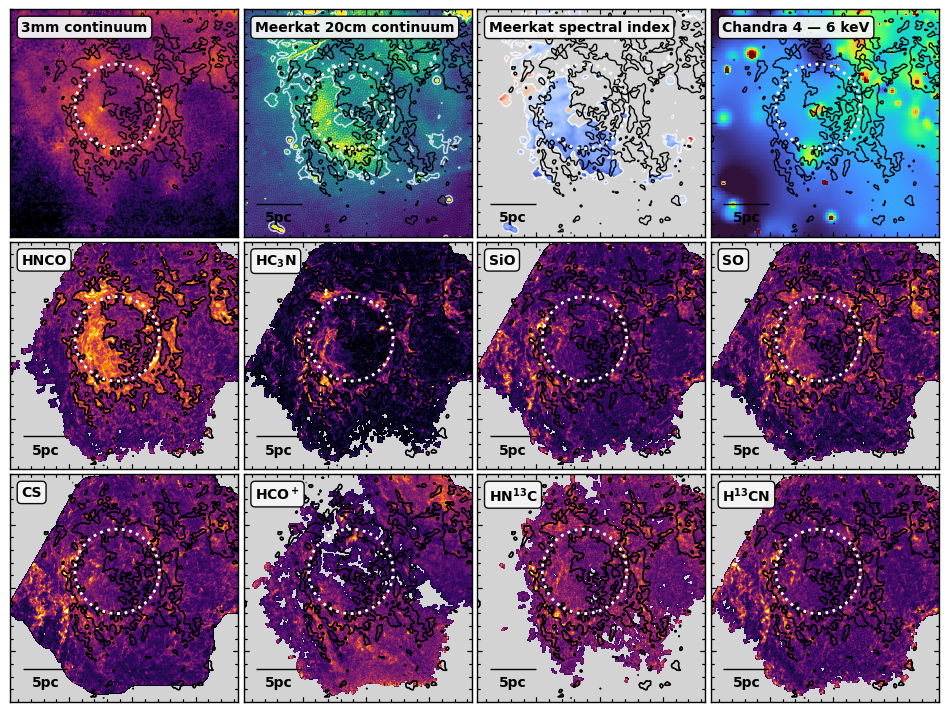

In [7]:
l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(12, 9)) 
ax = ['']* (4+len(hdus))

ax[0] = aplpy.FITSFigure(hdu_cont, figure=fig, subplot=(3,4,1))
ax[1] = aplpy.FITSFigure(hdu_meerkat, figure=fig, subplot=(3,4,2))
ax[2] = aplpy.FITSFigure(hdu_meerkatalpha, figure=fig, subplot=(3,4,3))
ax[3] = aplpy.FITSFigure(hdu_xray, figure=fig, subplot=(3,4,4))
  
vmin, vmax = np.nanpercentile(hdu_cont.data, [3,99.8])
ax[0].show_colorscale(cmap='inferno', vmin=vmin, vmax=vmax, stretch='linear', interpolation='nearest')

vmin, vmax = -0.00025, 0.0002
ax[1].show_colorscale(cmap='viridis', vmin=vmin, vmax=vmax, stretch='power', exponent=2, interpolation='nearest')

vmin, vmax = -2, 2
ax[2].show_colorscale(cmap='coolwarm', vmin=vmin, vmax=vmax, stretch='linear', interpolation='nearest')

vmin, vmax = np.nanpercentile(hdu_xray.data, [5,99.5])
ax[3].show_colorscale(cmap='turbo', vmin=vmin, vmax=vmax, stretch='linear', interpolation='nearest')

ax[1].show_contour(hdu_meerkatalpha_masked, levels=[0], colors='white', linewidths=1, filled=False, alpha=0.75)
ax[2].show_contour(hdu_meerkatalpha_masked, levels=[0], colors='white', linewidths=1, filled=False, alpha=0.75)

for i in range(4): 
    labels = ['3mm continuum', 'Meerkat 20cm continuum', 'Meerkat spectral index', 'Chandra 4 — 6 keV']
    ax[i].add_label(0.05, 0.95, labels[i], 
            ha='left', va='top',
            size=10,
            bbox = bbox,
            relative=True)  
    
for i, hdu in enumerate(hdus): 
    
    i = i+4
    ax[i] = aplpy.FITSFigure(hdu, figure=fig, subplot=(3,4,i+1))

    vmin, vmax = np.nanpercentile(hdu.data, [0.05,99.9])
    ax[i].show_colorscale(cmap='inferno', vmin=vmin, vmax=vmax, stretch='linear', interpolation='nearest')
    ax[i].show_contour(hdu_hnco, levels=[2.5], colors='black', linewidths=1)
    
    key = inputfiles[i-4].split('/')[-1].split('.')[0]
    ax[i].add_label(0.05, 0.95, name_dict[key], 
                ha='left', va='top',
                size=10,
                bbox = bbox,
                relative=True)  

for i in range(len(hdus)+4):
    
    ax[i].recenter(l, b, width=width, height=height)
    ax[i].tick_labels.hide()
    ax[i].axis_labels.hide()
    ax[i].ticks.set_color('black')
    ax[i].set_nan_color('lightgrey')
    ax[i].show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10)
    ax[i].add_scalebar(130*u.arcsec, corner='bottom left')
    ax[i].scalebar.set_label('5pc')

    ax[i].show_contour(hdu_hnco, levels=[2.5], colors='black', linewidths=1)
    
    # ax[i].show_contour(hdu_cont, levels=[2e-3], colors='white', linewidths=1, smooth=11, convention='wells')
    # ax[i].show_contour(hdu_cont, levels=[3.5e-3], colors='black', linewidths=1, smooth=11, convention='wells')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/multiwave_all_max.pdf', bbox_inches='tight', dpi=100)

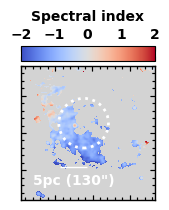

In [6]:
l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(2, 2)) 

ax = ['']*1

ax[0] = aplpy.FITSFigure(hdu_meerkatalpha, figure=fig, subplot=(1,1,1))
vmin, vmax = -2, 2
ax[0].show_colorscale(cmap='coolwarm', vmin=vmin, vmax=vmax, stretch='linear')

for i in range(1):
    
    ax[i].recenter(l, b, width=width, height=height)
    ax[i].tick_labels.hide()
    ax[i].axis_labels.hide()
    ax[i].ticks.set_color('black')
    ax[i].show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10)
    ax[i].set_nan_color('lightgrey')
    ax[i].add_scalebar(130*u.arcsec, corner='bottom left', color='white')
    ax[i].scalebar.set_label('5pc (130")')
    
    
    ax[i].add_colorbar()
    ax[i].colorbar.set_width(0.15)
    ax[i].colorbar.set_location('top')
    ax[i].colorbar.set_ticks([-2,-1,0,1,2])
    ax_cbar = fig.get_axes()[-1]
    ax_cbar.xaxis.set_ticks_position('top')
    
    ax[i].colorbar.set_axis_label_text('Spectral index')
    
fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/multiwave_spectralindex.pdf')